<h4>Apertura de archivo, mismos comandos que el archivo Desafio1</h4>

In [13]:
import numpy as np
import pandas as pd
import chardet
import re
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [14]:
#Se define la ruta de la información.
data_propiedades = "../Data/properati.csv"

In [15]:
#Leemos los datos del archivo
data = pd.read_csv(data_propiedades, sep=",", encoding="UTF-8")

In [16]:
#Chequeamos que los datos se hayan importado correctamente
data.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


<strong>La columna Unnamed:0 parece ser un indice, o lo renombramos o le ponemos index, aunque no se si conviene tener repetido.</strong>

In [17]:
#Chequeamos que los datos se hayan importado correctamente
data.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

In [18]:
data.rename(columns={'Unnamed: 0': "Index"}, inplace=True)
data

,Index,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121215,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,93.0,7699.115044,9354.838710,NaN,NaN,10000.0,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...
121216,121216,sell,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436080.0,NaN,NaN,...,360.0,1383.333333,1383.333333,NaN,NaN,NaN,http://www.properati.com.ar/1cja6_venta_casa_b...,Excelente e impecable casa en Venta en Las Lom...,Ruca Inmuebles | Venta | Lomas de San Isidro |...,https://thumbs4.properati.com/2/PCc3WuQDjpNZc4...
121217,121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,...,39.0,2858.695652,3371.794872,NaN,NaN,NaN,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...
121218,121218,sell,apartment,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,NaN,NaN,NaN,...,48.0,1997.916667,1997.916667,NaN,NaN,NaN,http://www.properati.com.ar/1cja8_venta_depart...,"2 Amb al contrafrente, luminoso. El departame...",2 amb. C/ dep. de servicio al contrafrente| Re...,https://thumbs4.properati.com/8/Q12PTvU6BQJ0ib...


Veo que lat-lon son Object, o sea String y lat y lot por separado con float64, deberia analizar si tengo misma cantidades de ambos datos, entonces reviso la cantidad de campos null que tengo, para saber si son datos representativos.

In [19]:
np.round(data.count() / data.isnull().count(), 2)

Index                         1.00
operation                     1.00
property_type                 1.00
place_name                    1.00
place_with_parent_names       1.00
country_name                  1.00
state_name                    1.00
geonames_id                   0.85
lat-lon                       0.57
lat                           0.57
lon                           0.57
price                         0.83
currency                      0.83
price_aprox_local_currency    0.83
price_aprox_usd               0.83
surface_total_in_m2           0.68
surface_covered_in_m2         0.84
price_usd_per_m2              0.57
price_per_m2                  0.72
floor                         0.07
rooms                         0.39
expenses                      0.12
properati_url                 1.00
description                   1.00
title                         1.00
image_thumbnail               0.97
dtype: float64

OK, vemos que hay muchos campos con información faltante algunos como <u>floor</u> y posiblemente <u>rooms</u> tienen pocos datos, hay que ver si se pueden utilizar dependiendo de la zona "provincia" que deseemos estudiar. Pero eso no importanta por el momento, <strong>tendria que responder esos 57% de datos geolocalizados que poseeo de donde son?</strong> para ver si nos quedamos con datos especificos y descartamos localidades que no tengamos datos.

<strong>Se me ocurre hacer una mascara booleana para luego limpiar los datos.</strong>

In [20]:
coordenadas = pd.DataFrame(data, columns=['Index','place_name','geonames_id','lat', 'lon'])
coordenadas.head()

,Index,place_name,geonames_id,lat,lon
0,0,Mataderos,3430787.0,-34.661824,-58.508839
1,1,La Plata,3432039.0,-34.903883,-57.964330
2,2,Mataderos,3430787.0,-34.652262,-58.522982
3,3,Liniers,3431333.0,-34.647797,-58.516424
4,4,Centro,3435548.0,-38.002626,-57.549447


Volvemos a revisar los datos, vemos los % de completitud de la información.

In [21]:
np.round(coordenadas.count()/coordenadas.isnull().count(), 2)

Index          1.00
place_name     1.00
geonames_id    0.85
lat            0.57
lon            0.57
dtype: float64

Vemos que los valores de Latitud y Longitud son los datos representativos faltantes.

In [22]:
coordenadas_existentes = coordenadas.dropna()
coordenadas_existentes

,Index,place_name,geonames_id,lat,lon
0,0,Mataderos,3430787.0,-34.661824,-58.508839
1,1,La Plata,3432039.0,-34.903883,-57.964330
2,2,Mataderos,3430787.0,-34.652262,-58.522982
3,3,Liniers,3431333.0,-34.647797,-58.516424
4,4,Centro,3435548.0,-38.002626,-57.549447
...,...,...,...,...,...
121153,121153,Barrio Norte,3436109.0,-34.599214,-58.402519
121158,121158,Recoleta,3429595.0,-34.587425,-58.397372
121160,121160,Belgrano,3436077.0,-34.563685,-58.442683
121209,121209,Belgrano,3436077.0,-34.563685,-58.442683


Ok, volvemos a revisar cual es el % de completitud.

In [23]:
np.round(coordenadas_existentes.count()/coordenadas_existentes.isnull().count(), 2)

Index          1.0
place_name     1.0
geonames_id    1.0
lat            1.0
lon            1.0
dtype: float64

In [24]:
print(coordenadas_existentes.shape)

(59138, 5)


<strong>Bien, tengo todos los datos completo, ahora vemos a que lugar pertenecen.</strong>

In [25]:
coordenadas_existentes.place_name.value_counts().sort_values(ascending=False).head(10)

Mar del Plata    5832
Rosario          3986
Córdoba          3513
Palermo          2086
Belgrano         1973
Caballito        1827
Recoleta         1278
Flores           1199
Villa Urquiza    1088
La Plata         1065
Name: place_name, dtype: int64

In [47]:
coordenadas_existentes.geonames_id.value_counts().sort_values(ascending=False).head(10)

3430863.0    5832
3838574.0    3986
3860259.0    3064
3430234.0    2243
3436077.0    1973
3435874.0    1827
3429595.0    1278
3433918.0    1199
3433775.0    1087
3432039.0    1065
Name: geonames_id, dtype: int64

El <strong>geonames_id</strong> es el codigo de lugar, simplificaría mostrarlo en el mapa?

Tendriamos que revisar si estos lugares tambien tienen <strong>completitud del resto de los datos</strong> y si están de acuerdo a que puede ser una manera de elegir que datos incluir

In [26]:
mapa_argentina = gpd.read_file('../Mapa/provincia.shp')

<AxesSubplot:>

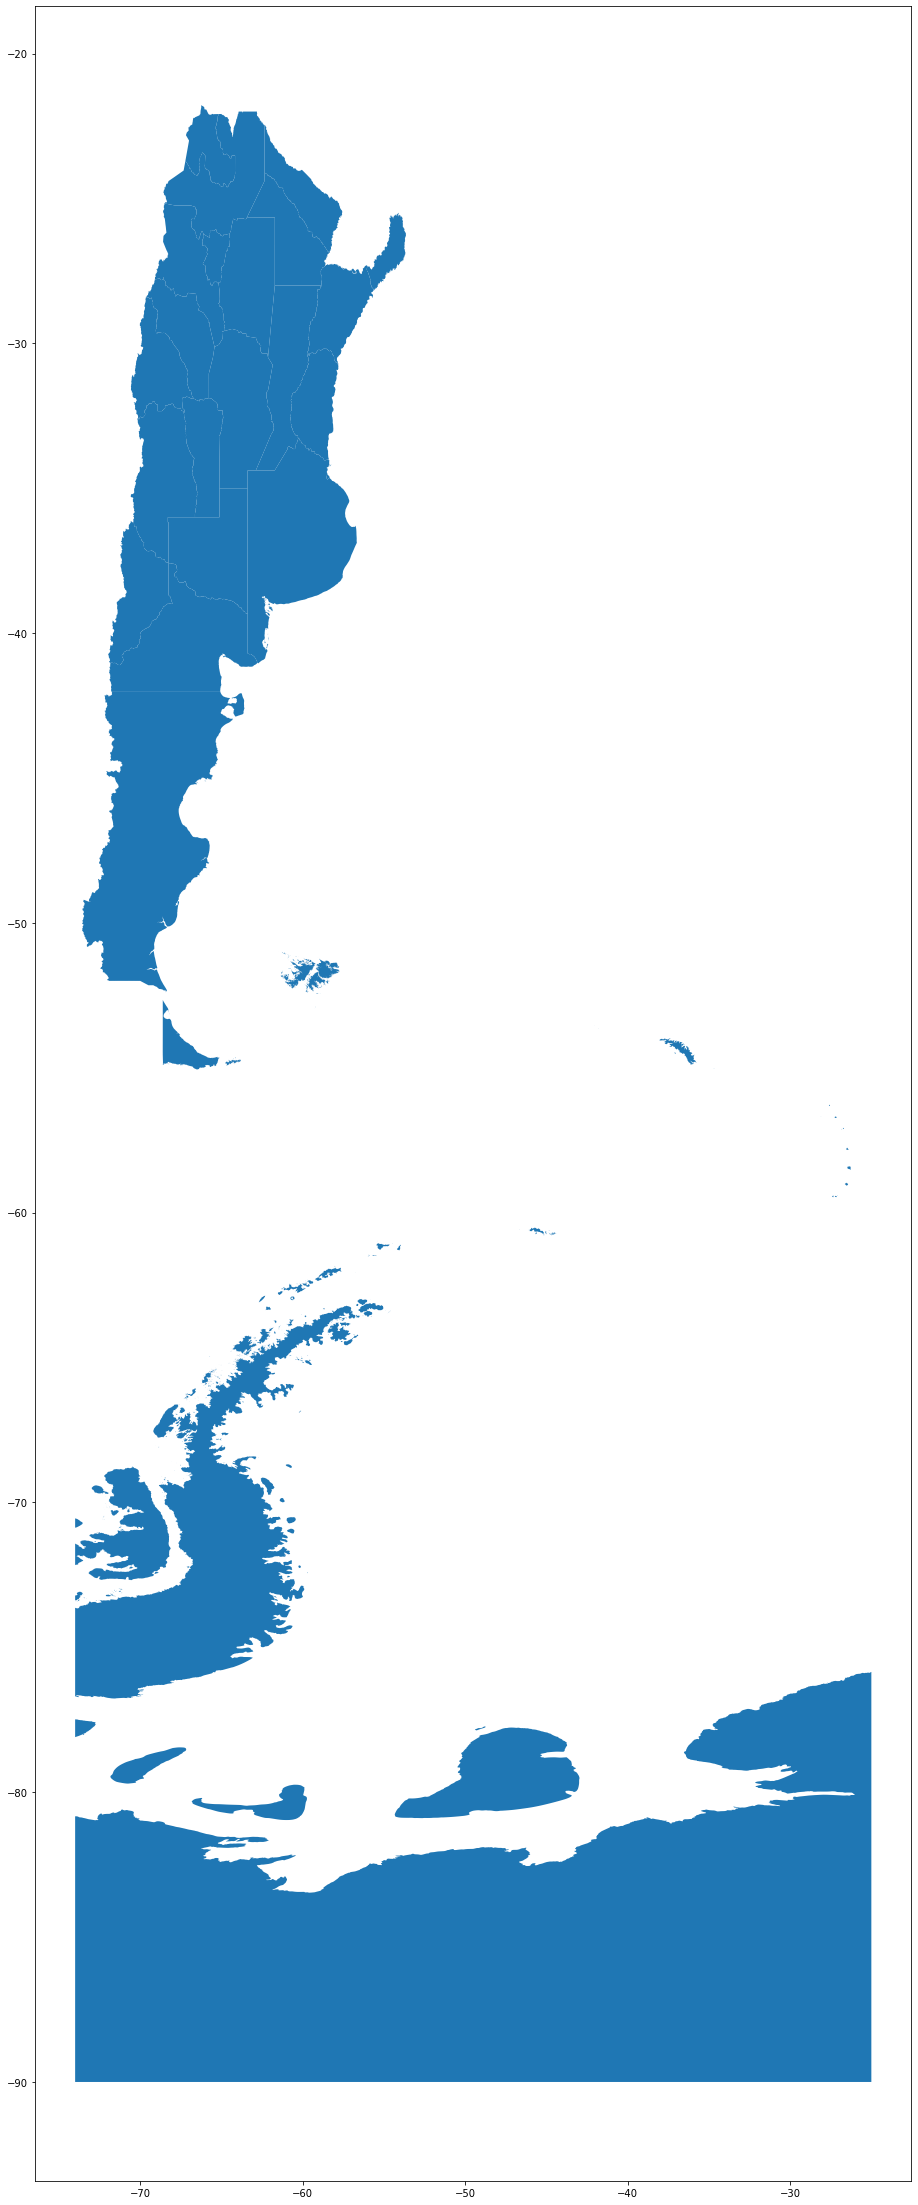

In [27]:
fig,ax = plt.subplots(figsize = (25, 40))
mapa_argentina.plot(ax = ax)

In [31]:
# e4326=CRS('EPSG:4326')
crs = {'init': 'EPSG:4326'}
geometry = [Point(xy) for xy in zip(coordenadas_existentes['lon'], coordenadas_existentes['lat'])]
geometry[:3]

In [33]:
geo_coordenadas = gpd.GeoDataFrame(coordenadas_existentes,
                                   geometry = geometry)
geo_coordenadas.head()

,Index,place_name,geonames_id,lat,lon,geometry
0,0,Mataderos,3430787.0,-34.661824,-58.508839,POINT (-58.50884 -34.66182)
1,1,La Plata,3432039.0,-34.903883,-57.964330,POINT (-57.96433 -34.90388)
2,2,Mataderos,3430787.0,-34.652262,-58.522982,POINT (-58.52298 -34.65226)
3,3,Liniers,3431333.0,-34.647797,-58.516424,POINT (-58.51642 -34.64780)
4,4,Centro,3435548.0,-38.002626,-57.549447,POINT (-57.54945 -38.00263)


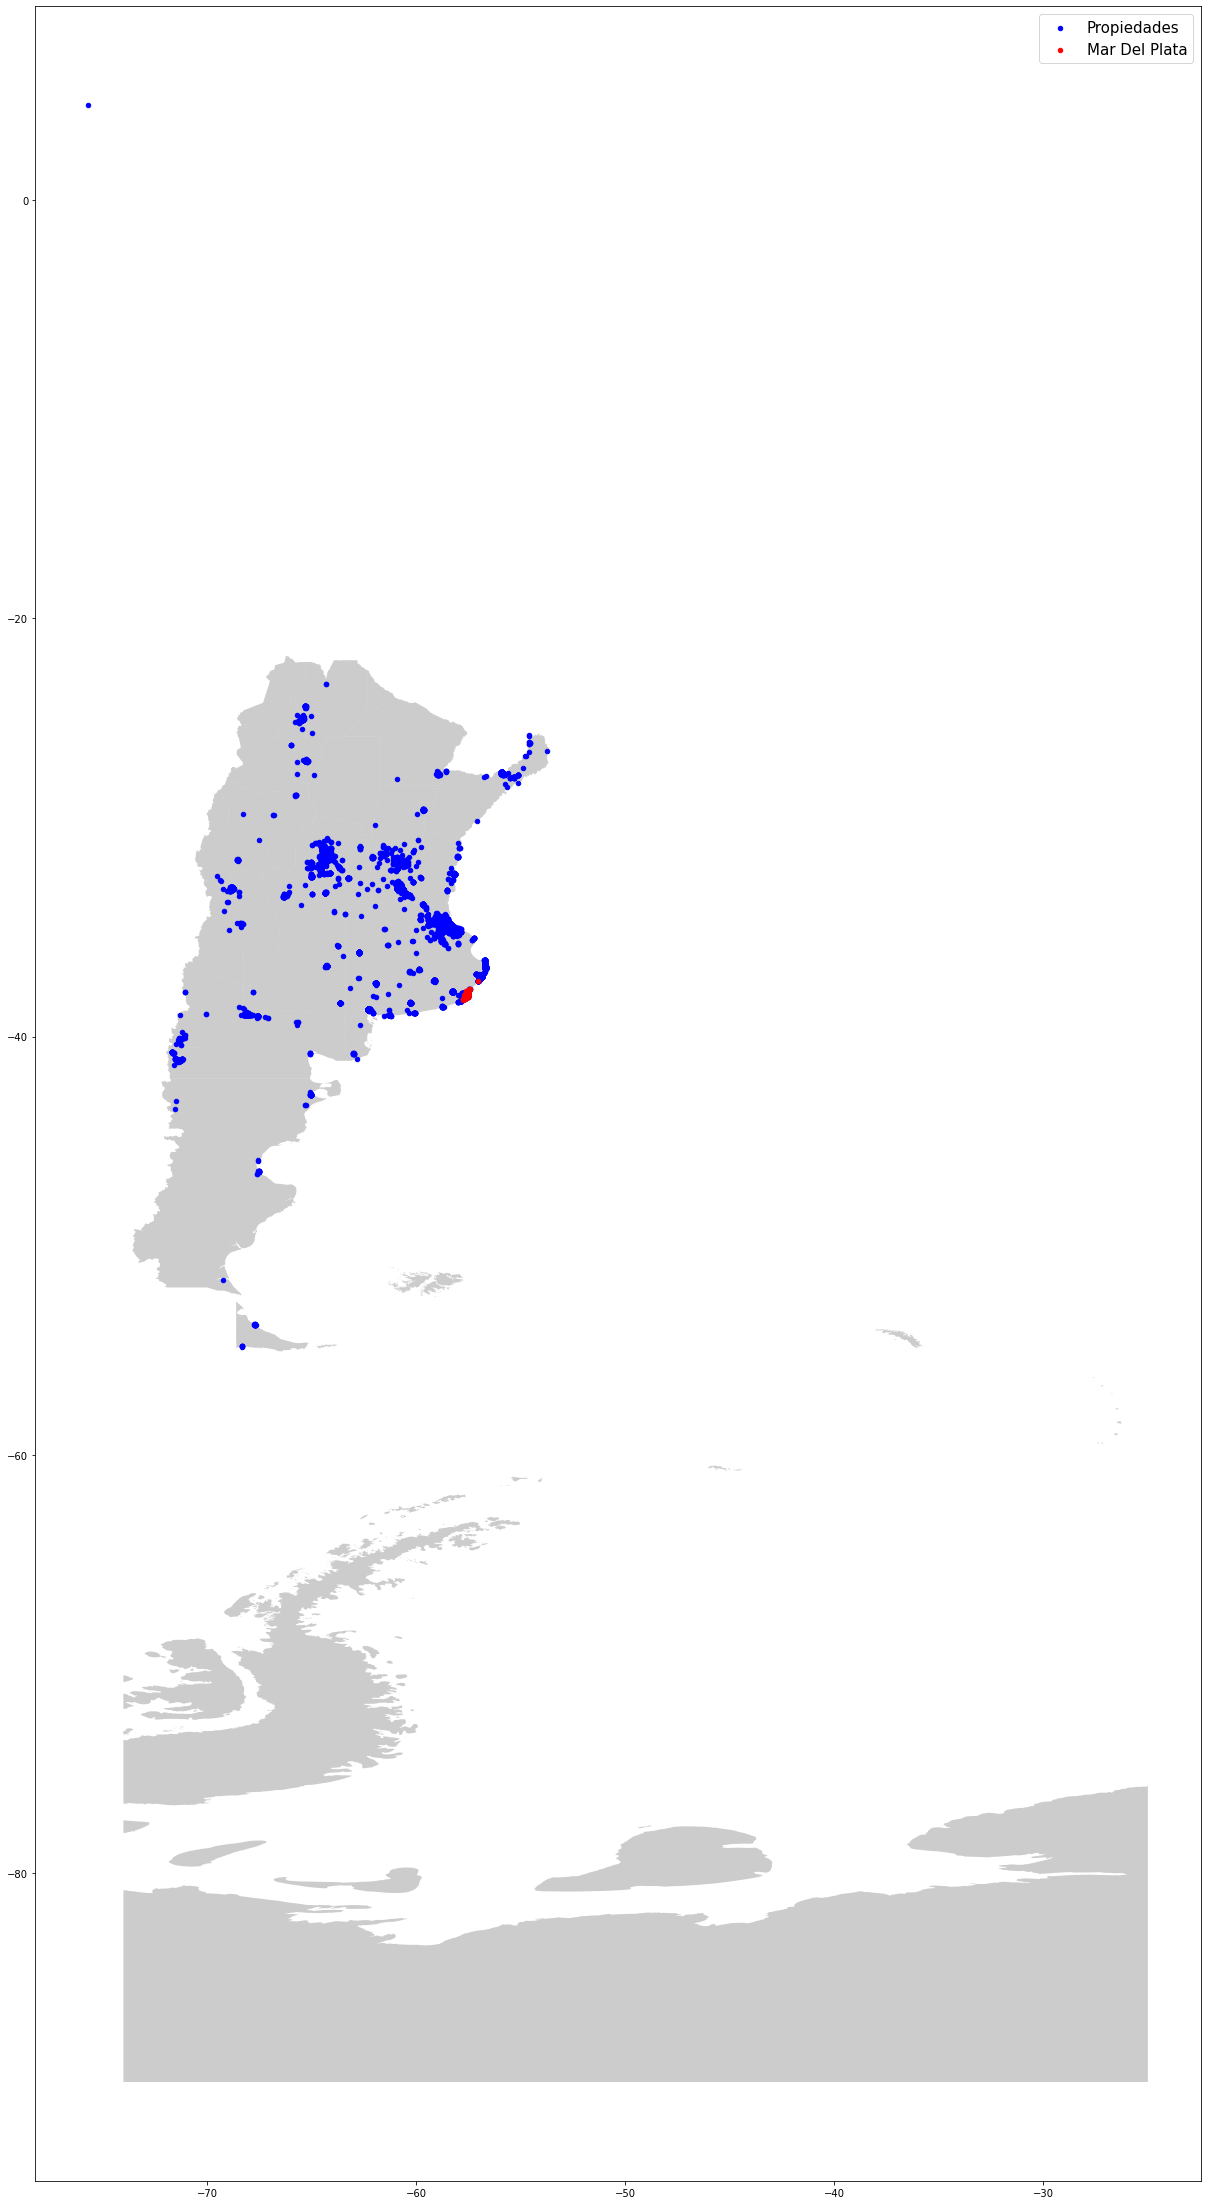

In [53]:
fig,ax = plt.subplots(figsize = (25, 40))
mapa_argentina.plot(ax = ax, alpha = 0.4, color="grey")

geo_coordenadas[geo_coordenadas['geonames_id'] > 0].plot(ax = ax, markersize = 20, color = 'blue', marker = 'o', label = 'Propiedades')
geo_coordenadas[geo_coordenadas['geonames_id'] == 3430863.0].plot(ax = ax, markersize = 20, color = 'red', marker = 'o', label = 'Mar Del Plata')
plt.legend(prop={'size': 15})

<h2>Si quiero imprimir todo lo de Mar del Planta </h2>

3430863.0    5832
3838574.0    3986
3860259.0    3064
3430234.0    2243
3436077.0    1973
             ... 
3840685.0       1
3841149.0       1
3841488.0       1
3432077.0       1
3860197.0       1
Name: geonames_id, Length: 570, dtype: int64

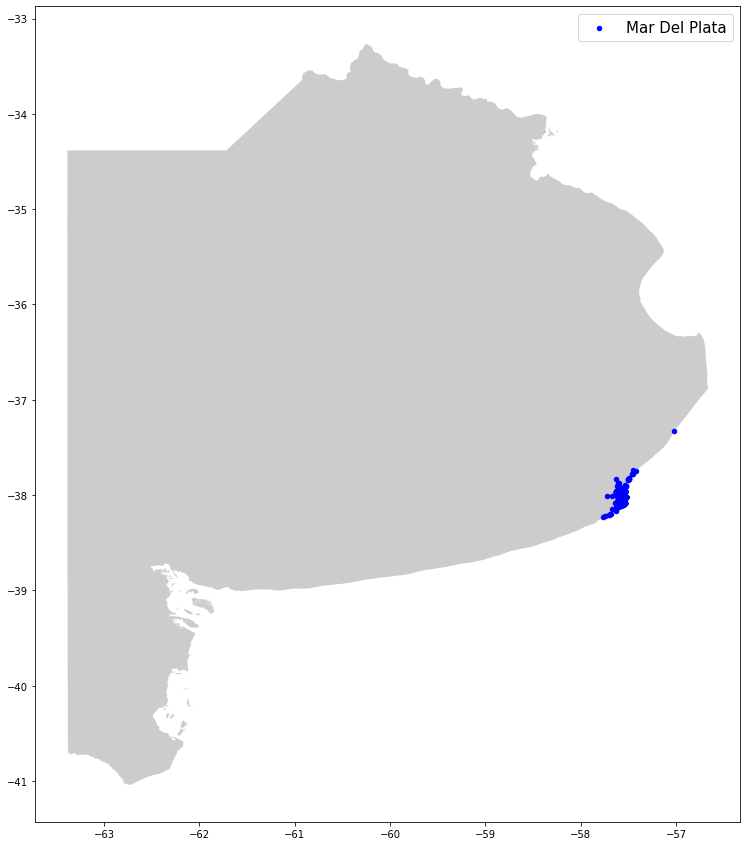

In [63]:
mapa_bsas = gpd.read_file('../Mapa/bsas.shp')
fig,ax = plt.subplots(figsize = (15, 15))
mapa_bsas.plot(ax = ax, alpha = 0.4, color="grey")
geo_coordenadas[geo_coordenadas['geonames_id'] == 3430863.0].plot(ax = ax, markersize = 20, color = 'blue', marker = 'o', label = 'Mar Del Plata')
plt.legend(prop={'size': 15})
